In [1]:
import pandas as pd
import numpy as np

In [2]:
data1=r'C:\\Users\\shraddha\\Desktop\\ds\\FoxyMoron\\Campaign.csv'

In [3]:
bank_data=pd.read_csv(data1)# for data visualization

In [54]:
term_deposits=pd.read_csv(data1)

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Attributes Description:

bank client data:

[1] - age: (numeric)

[2] - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

[3] - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

[4] - education: (categorical: primary, secondary, tertiary and unknown)

[5] - default: has credit in default? (categorical: 'no','yes','unknown')

[6] - housing: has housing loan? (categorical: 'no','yes','unknown')

[7] - loan: has personal loan? (categorical: 'no','yes','unknown')

[8] - balance: Balance of the individual.

[9] - contact: contact communication type (categorical: 'cellular','telephone')

[10] - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

[11] - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

[12] - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

[13] - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

[14] - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

[15] - previous: number of contacts performed before this campaign and for this client (numeric)

[16] - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
[17] - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [18]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


from above summary we can observe that:

        [i] Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
        
        [ii] The mean balance is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.
        
        [iii]As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client. 

In [19]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

we can observe from above that no null value in bank data, so there is no need to fill any missing values

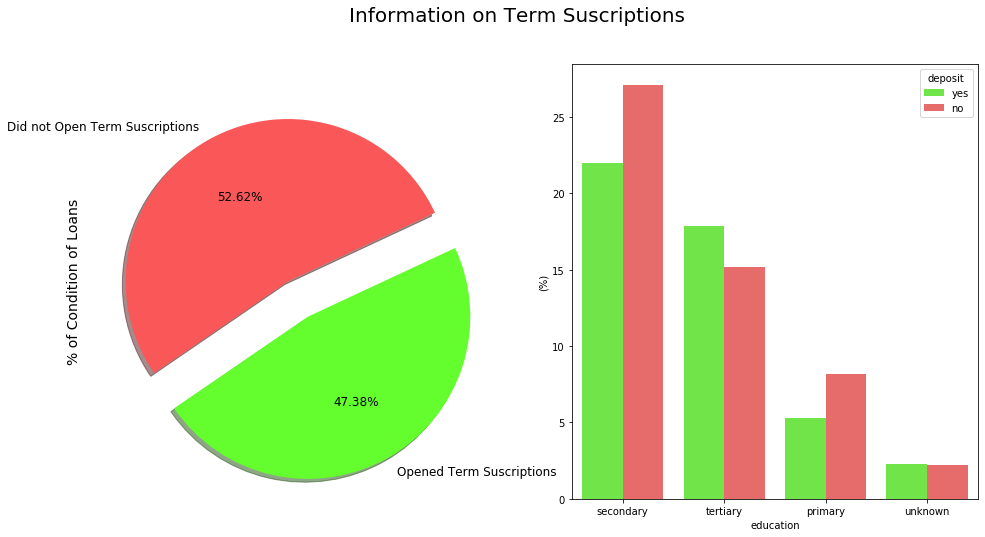

In [20]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

bank_data["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=bank_data, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=bank_data, palette=palette, estimator=lambda x: len(x) / len(bank_data) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(bank_data["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

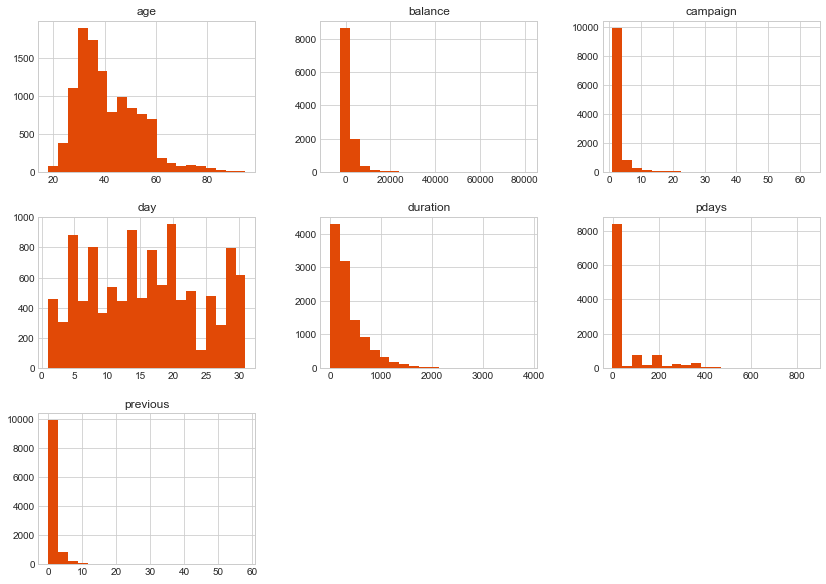

In [21]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

bank_data.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [22]:
bank_data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

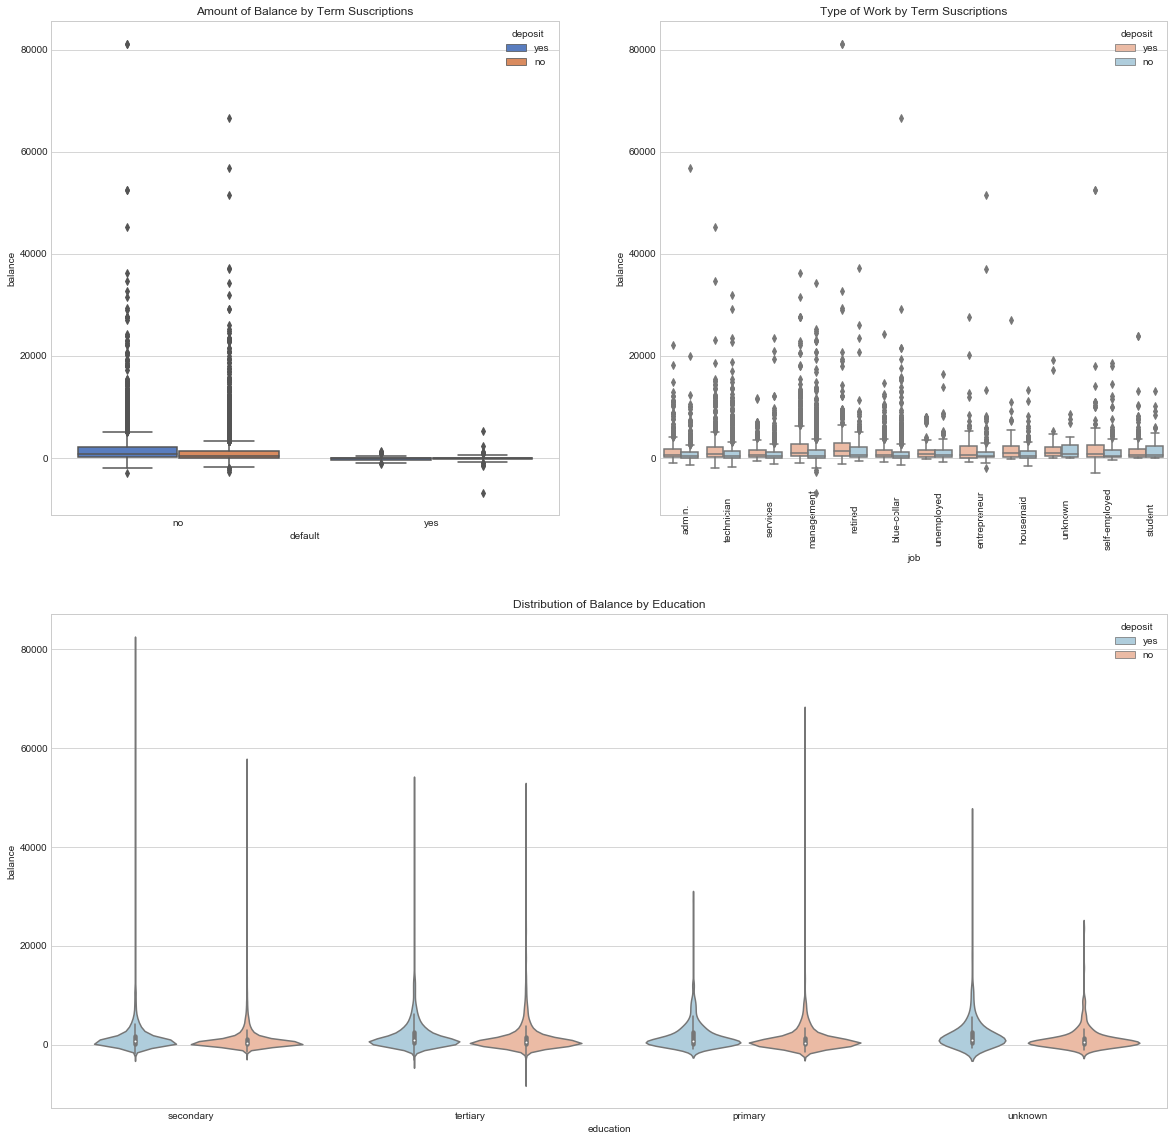

In [24]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=bank_data, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(bank_data["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=bank_data, palette="RdBu", ax=ax2)

g1.set_xticklabels(bank_data["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=bank_data, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

In [26]:
import squarify
bank_data = bank_data.drop(bank_data.loc[bank_data["balance"] == 0].index)


x = 0
y = 0
width = 100
height = 100

job_names = bank_data['job'].value_counts().index
values = bank_data['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

In [27]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_bank_data = bank_data.loc[bank_data["deposit"] == "yes"]

occupations = bank_data["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_bank_data["age"].loc[suscribed_bank_data["job"] == "management"].values
technician = suscribed_bank_data["age"].loc[suscribed_bank_data["job"] == "technician"].values
services = suscribed_bank_data["age"].loc[suscribed_bank_data["job"] == "services"].values
retired = suscribed_bank_data["age"].loc[suscribed_bank_data["job"] == "retired"].values
blue_collar = suscribed_bank_data["age"].loc[suscribed_bank_data["job"] == "blue-collar"].values
unemployed = suscribed_bank_data["age"].loc[suscribed_bank_data["job"] == "unemployed"].values
entrepreneur = suscribed_bank_data["age"].loc[suscribed_bank_data["job"] == "entrepreneur"].values
housemaid = suscribed_bank_data["age"].loc[suscribed_bank_data["job"] == "housemaid"].values
self_employed = suscribed_bank_data["age"].loc[suscribed_bank_data["job"] == "self-employed"].values
student = suscribed_bank_data["age"].loc[suscribed_bank_data["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [29]:
# Balance Distribution

# Create a Balance Category
bank_data["balance_status"] = np.nan
lst = [bank_data]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = bank_data["balance"].loc[bank_data["balance_status"] == "negative"].values.tolist()
low = bank_data["balance"].loc[bank_data["balance_status"] == "low"].values.tolist()
middle = bank_data["balance"].loc[bank_data["balance_status"] == "middle"].values.tolist()
high = bank_data["balance"].loc[bank_data["balance_status"] == "high"].values.tolist()


# Get the average by occupation in each balance category
job_balance = bank_data.groupby(['job', 'balance_status'])['balance'].mean()


trace1 = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=16
        )
    ),
    radialaxis=dict(
        ticksuffix='%'
    ),
    orientation=270
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar-area-chart')

from above analysis of occupation we can observe that:

Analysis by Occupation:

Number of Occupations: Management is the occupation that is more prevalent in this dataset.

Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.

Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts.

In [30]:
bank_data['marital'].value_counts()

married     5862
single      3351
divorced    1175
Name: marital, dtype: int64

In [33]:
vals = bank_data['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

In [34]:
# Distribution of Balances by Marital status
single = bank_data['balance'].loc[bank_data['marital'] == 'single'].values
married = bank_data['balance'].loc[bank_data['marital'] == 'married'].values
divorced = bank_data['balance'].loc[bank_data['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    histnorm='density', 
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

G:\Python\Anaconda\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



from above Marital Status analysis we can observe that:

In this analysis we didn't find any significant insights other than most divorced individuals are broke. No wonder since they have to split financial assets! Nevertheless, since no further insights have been found we will proceed to clustering marital status with education status. Let's see if we can find other groups of people in the sample population.

In [37]:
bank_data['marital/education'] = np.nan
lst = [bank_data]

for col in lst:
    col.loc[(col['marital'] == 'single') & (bank_data['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (bank_data['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (bank_data['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (bank_data['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (bank_data['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (bank_data['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (bank_data['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (bank_data['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (bank_data['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status,marital/education
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low,married/secondary
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low,married/secondary
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low,married/tertiary


In [38]:
bank_data = bank_data.drop(bank_data.loc[bank_data["education"] == "unknown"].index)
bank_data['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

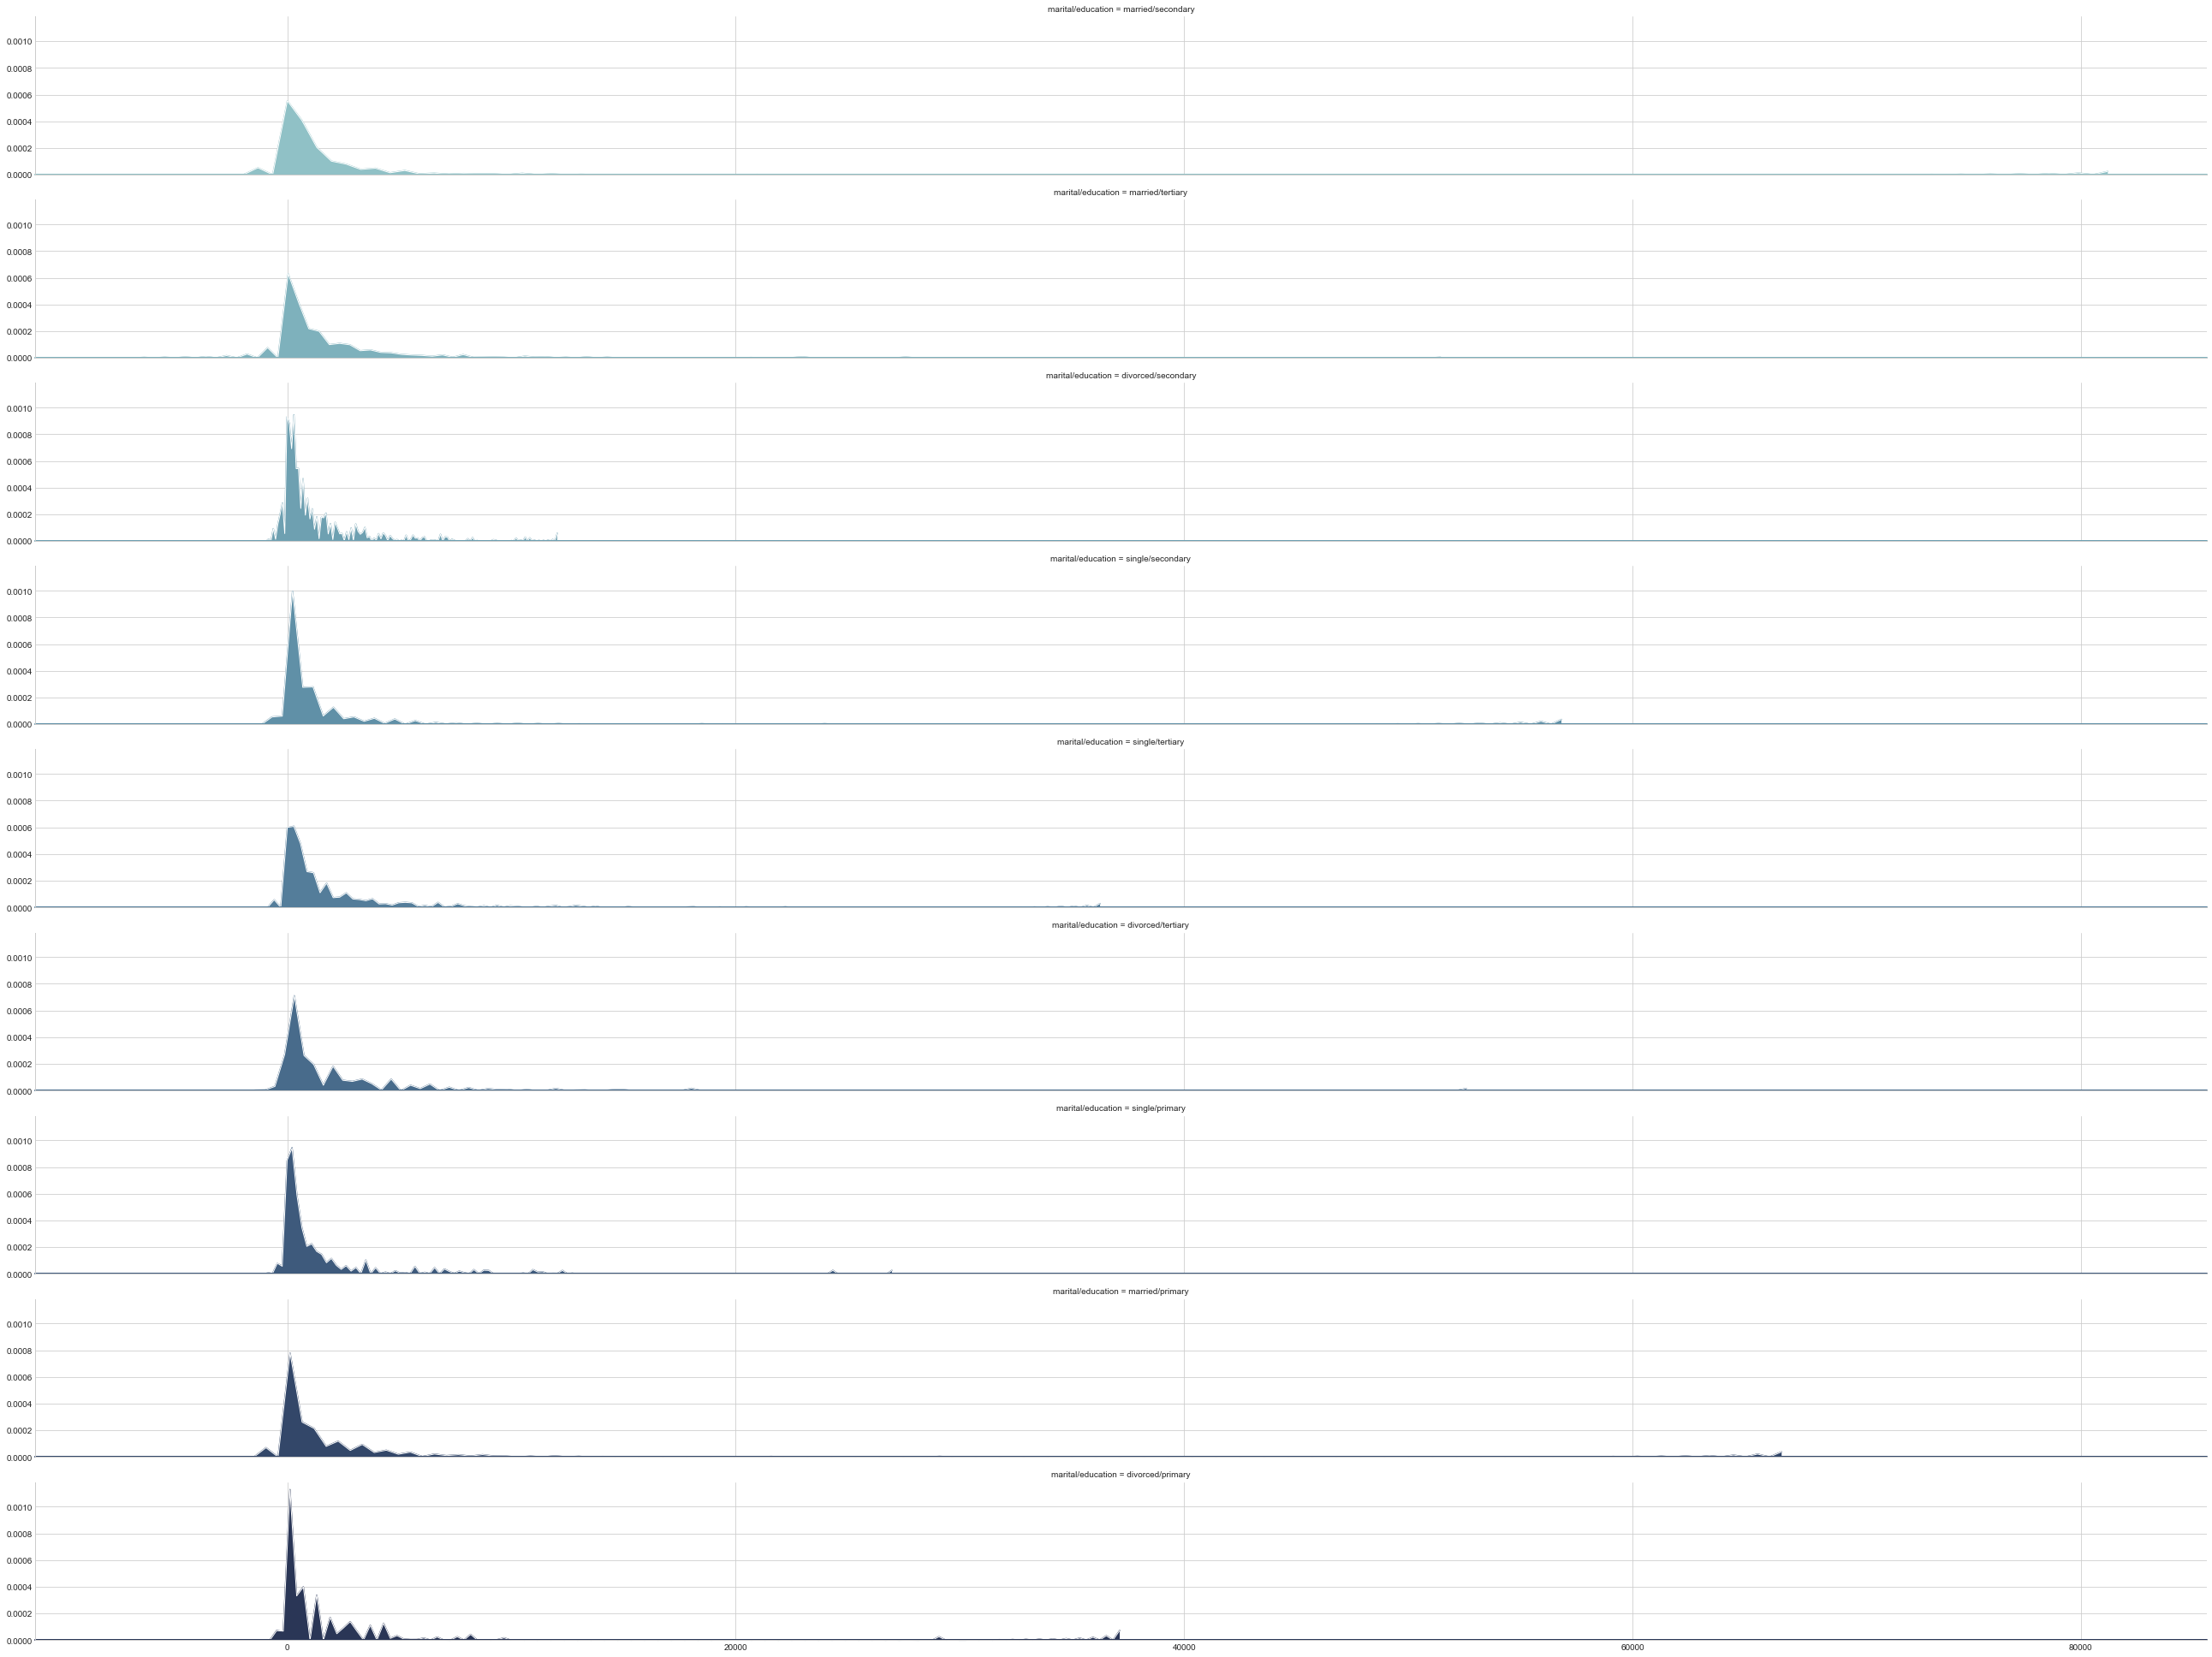

In [39]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(bank_data, row="marital/education", hue="marital/education", aspect=12, palette=pal)

g.map(sns.kdeplot, "balance", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "balance", clip_on=False, color="w", lw=1, bw=0)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

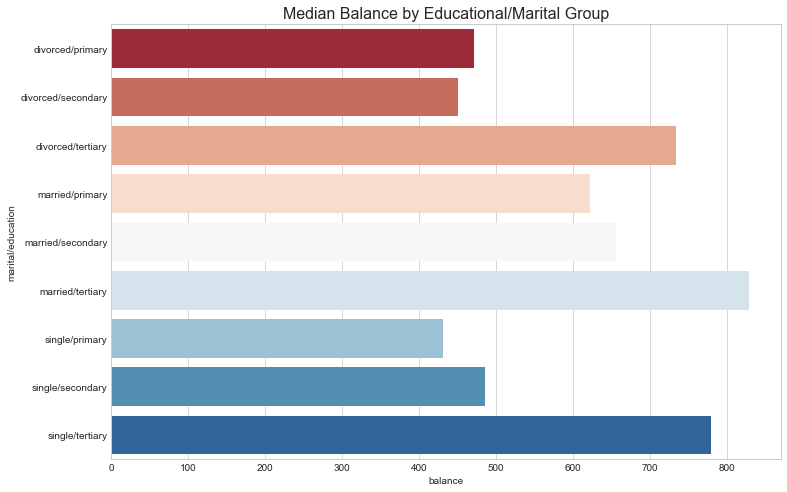

In [40]:
education_groups = bank_data.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))




sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [42]:
# Let's see the group who had loans from the marital/education group

loan_balance = bank_data.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

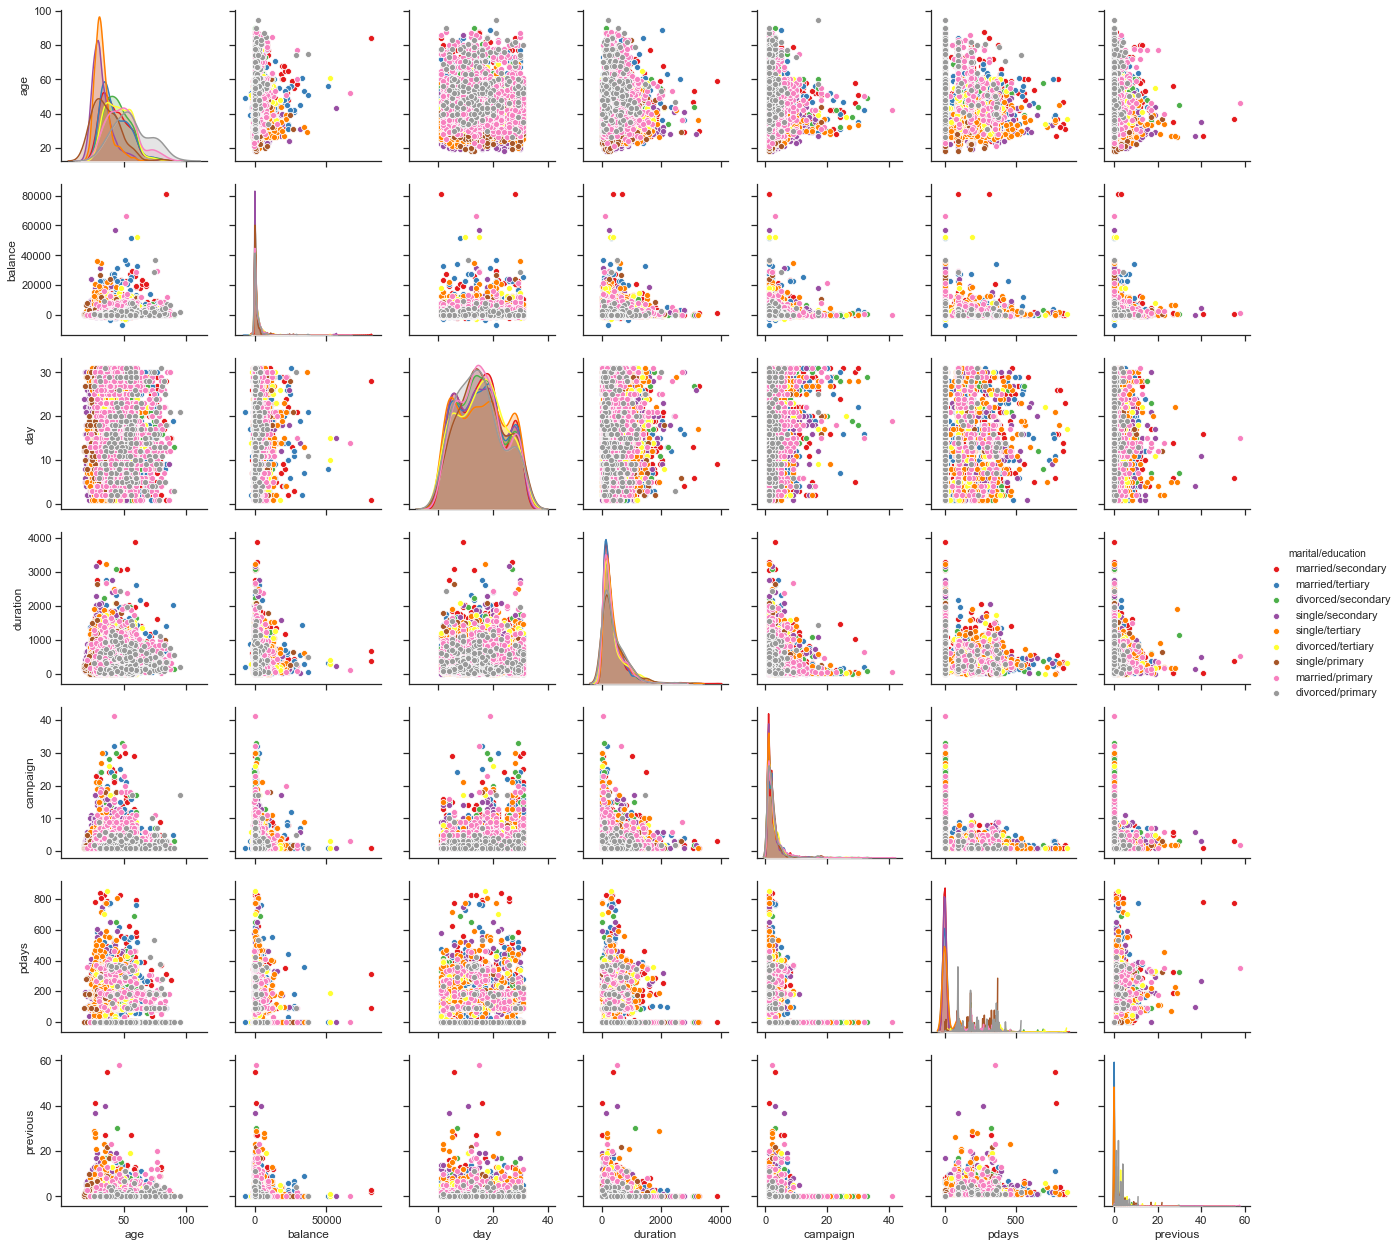

In [45]:
sns.set(style="ticks")

sns.pairplot(bank_data, hue="marital/education", palette="Set1")
plt.show()

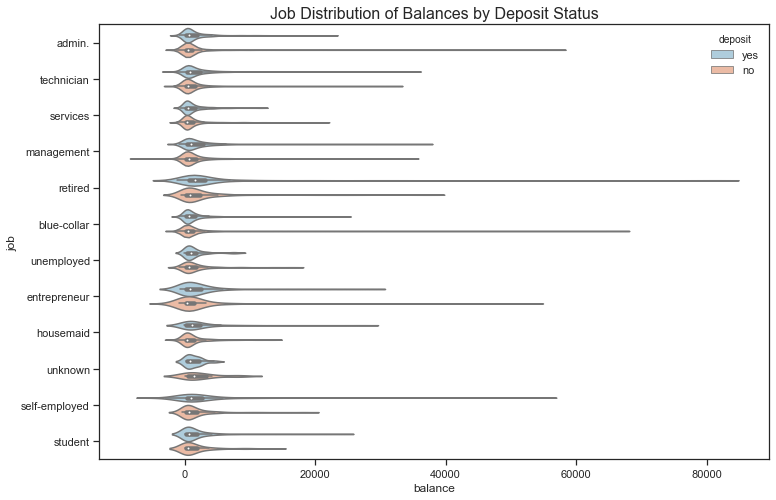

In [47]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=bank_data);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

from above analysis by Clustering Marital Status and Education:

    Marital Status: As discussed previously, the impact of a divorce has a significant impact on the balance of the individual.

    Education: The level of education also has a significant impact on the amount of balance a prospect has.

    Loans: Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has.

In [48]:
bank_data.drop(['marital/education', 'balance_status'], axis=1, inplace=True)

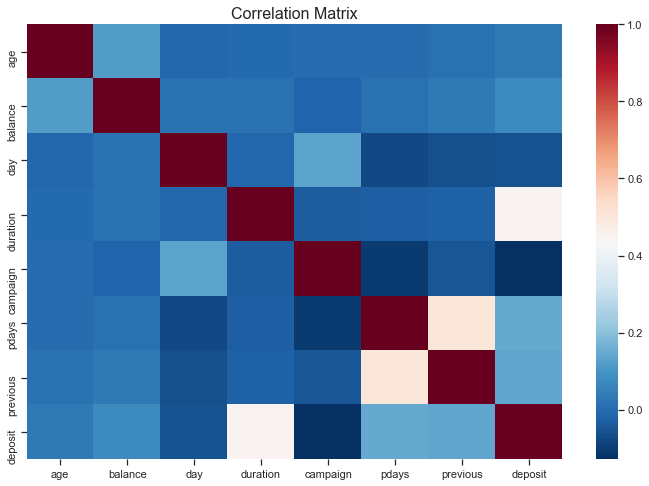

In [50]:
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
bank_data['deposit'] = LabelEncoder().fit_transform(bank_data['deposit'])



# Separate both dataframes into 
numeric_bank_data = bank_data.select_dtypes(exclude="object")
# categorical_bank_data = bank_data.select_dtypes(include="object")

corr_numeric = numeric_bank_data.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

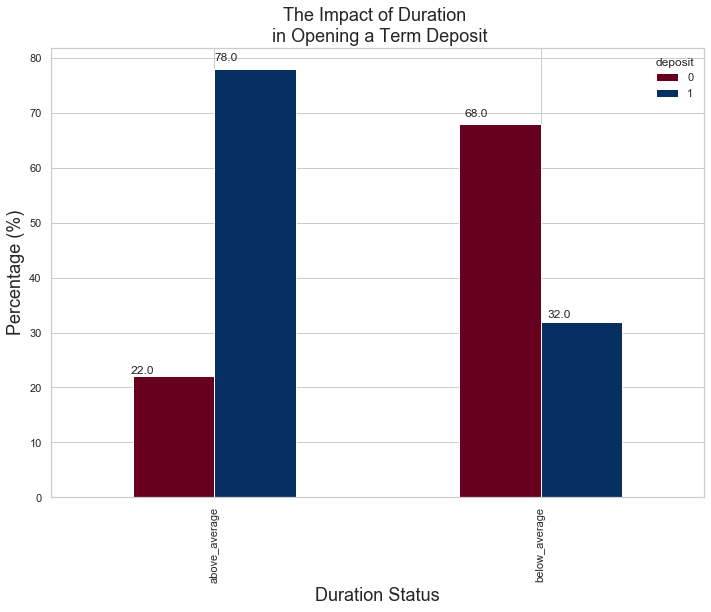

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = bank_data['duration'].mean()

lst = [bank_data]
bank_data["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(bank_data['duration_status'], bank_data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

In [55]:
dep = term_deposits['deposit']
term_deposits.drop(labels=['deposit'], axis=1,inplace=True)
term_deposits.insert(0, 'deposit', dep)
term_deposits.head()
# housing has a -20% correlation with deposit let's see how it is distributed.
# 52 %
term_deposits["housing"].value_counts()/len(term_deposits)

no     0.526877
yes    0.473123
Name: housing, dtype: float64

In [57]:
term_deposits["loan"].value_counts()/len(term_deposits)

no     0.869199
yes    0.130801
Name: loan, dtype: float64

In [65]:
term_deposits.shape

(11162, 17)

In [71]:
cat_vars=term_deposits.select_dtypes(['object']).columns

In [72]:
cat_vars

Index(['deposit', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome'],
      dtype='object')

In [73]:
for col in cat_vars[:]:
    dummy=pd.get_dummies(term_deposits[col],drop_first=True,prefix=col)
    term_deposits=pd.concat([term_deposits,dummy],axis=1)
    del term_deposits[col]
    print(col)
del dummy

deposit
job
marital
education
default
housing
loan
contact
month
poutcome


In [76]:
term_deposits.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit_yes', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [66]:
import statsmodels.api as sm

In [77]:
X=term_deposits.drop(['deposit_yes'], axis=1)

In [78]:
X = sm.add_constant(X)

In [79]:
y=term_deposits['deposit_yes']

In [80]:
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

In [81]:
prediction1 = model.predict(X)

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            deposit_yes   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:35:46   Log-Likelihood:                -5031.5
No. Observations:               11162   AIC:                         1.015e+04
Df Residuals:                   11119   BIC:                         1.046e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4288      0.038     11.375      0.000       0.355       0.503
age                    -0.0002      0.000     -0.432      0.666      -0.001       0.001
balance              3.841e-06   1.14e-06      3.361      0.001     1.6e-06    6.08e-06
day                     0.0001      0.000      0.279      0.780      -0.001       0.001
duration                0.0007   1.05e-05     63.547      0.000       0.001       0.001
campaign               -0.0090      0.001     -6.434      0.000      -0.012      -0.006
pdays                -2.92e-05   6.21e-05     -0.470      0.638      -0.000    9.25e-05
previous                0.0016      0.002      0.793      0.428      -0.002       0.006
job_blue-collar        -0.0387      0.014     -2.719      0.007      -0.067      -0.011
job_entrepreneur       -0.0529      0.024     -2.215      0.027      -0.100      -0.006
job_housemaid          -0.0707      0.026     -2.698      0.007      -0.122      -0.019
job_management         -0.0380      0.015     -2.525      0.012      -0.067      -0.008
job_retired             0.0570      0.020      2.806      0.005       0.017       0.097
job_self-employed      -0.0602      0.022     -2.713      0.007      -0.104      -0.017
job_services           -0.0419      0.016     -2.559      0.011      -0.074      -0.010
job_student             0.1078      0.024      4.486      0.000       0.061       0.155
job_technician         -0.0187      0.014     -1.346      0.178      -0.046       0.009
job_unemployed         -0.0104      0.023     -0.452      0.651      -0.055       0.035
job_unknown            -0.0566      0.048     -1.181      0.237      -0.151       0.037
marital_married        -0.0265      0.012     -2.257      0.024      -0.050      -0.003
marital_single          0.0112      0.014      0.824      0.410      -0.015       0.038
education_secondary     0.0243      0.012      1.986      0.047       0.000       0.048
education_tertiary      0.0645      0.015      4.388      0.000       0.036       0.093
education_unknown       0.0436      0.021      2.112      0.035       0.003       0.084
default_yes             0.0006      0.030      0.021      0.984      -0.058       0.059
housing_yes            -0.1047      0.009    -12.086      0.000      -0.122      -0.088
loan_yes               -0.0710      0.011     -6.420      0.000      -0.093      -0.049
contact_telephone      -0.0376      0.015     -2.518      0.012      -0.067      -0.008
contact_unknown        -0.2221      0.012    -17.889      0.000      -0.246      -0.198
month_aug              -0.1536      0.017     -9.226      0.000      -0.186      -0.121
month_dec               0.1559      0.039      4.021      0.000       0.080       0.232
month_feb              -0.0558      0.019     -2.885      0.004      -0.094      -0.018
mon

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [84]:
from sklearn import svm

In [85]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(C=1, gamma='auto')

In [86]:
svc.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
y_pred = svc.predict(X_test)

In [89]:
from sklearn import metrics
print("SVM model accuracy:", metrics.accuracy_score(y_test, y_pred))

SVM model accuracy: 0.5302283922973579


In [90]:
print("SVM model accuracy:", metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

SVM model accuracy: 0.3649839748277432


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [92]:
knn=KNeighborsClassifier(n_neighbors=10)

In [93]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [94]:
predictions=knn.predict(X_test)

In [95]:
metrics.accuracy_score(y_test,predictions)

0.7586206896551724

In [96]:
metrics.fbeta_score(y_test, predictions, average='weighted', beta=0.5)

0.7583081345407108

from above prediction we can conclude that knn algorithm is suitable for this dataset than SVM

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            deposit_yes   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:41:48   Log-Likelihood:                -5031.5
No. Observations:               11162   AIC:                         1.015e+04
Df Residuals:                   11119   BIC:                         1.046e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4288      0.038     11.375      0.000       0.355       0.503
age                    -0.0002      0.000     -0.432      0.666      -0.001       0.001
balance              3.841e-06   1.14e-06      3.361      0.001     1.6e-06    6.08e-06
day                     0.0001      0.000      0.279      0.780      -0.001       0.001
duration                0.0007   1.05e-05     63.547      0.000       0.001       0.001
campaign               -0.0090      0.001     -6.434      0.000      -0.012      -0.006
pdays                -2.92e-05   6.21e-05     -0.470      0.638      -0.000    9.25e-05
previous                0.0016      0.002      0.793      0.428      -0.002       0.006
job_blue-collar        -0.0387      0.014     -2.719      0.007      -0.067      -0.011
job_entrepreneur       -0.0529      0.024     -2.215      0.027      -0.100      -0.006
job_housemaid          -0.0707      0.026     -2.698      0.007      -0.122      -0.019
job_management         -0.0380      0.015     -2.525      0.012      -0.067      -0.008
job_retired             0.0570      0.020      2.806      0.005       0.017       0.097
job_self-employed      -0.0602      0.022     -2.713      0.007      -0.104      -0.017
job_services           -0.0419      0.016     -2.559      0.011      -0.074      -0.010
job_student             0.1078      0.024      4.486      0.000       0.061       0.155
job_technician         -0.0187      0.014     -1.346      0.178      -0.046       0.009
job_unemployed         -0.0104      0.023     -0.452      0.651      -0.055       0.035
job_unknown            -0.0566      0.048     -1.181      0.237      -0.151       0.037
marital_married        -0.0265      0.012     -2.257      0.024      -0.050      -0.003
marital_single          0.0112      0.014      0.824      0.410      -0.015       0.038
education_secondary     0.0243      0.012      1.986      0.047       0.000       0.048
education_tertiary      0.0645      0.015      4.388      0.000       0.036       0.093
education_unknown       0.0436      0.021      2.112      0.035       0.003       0.084
default_yes             0.0006      0.030      0.021      0.984      -0.058       0.059
housing_yes            -0.1047      0.009    -12.086      0.000      -0.122      -0.088
loan_yes               -0.0710      0.011     -6.420      0.000      -0.093      -0.049
contact_telephone      -0.0376      0.015     -2.518      0.012      -0.067      -0.008
contact_unknown        -0.2221      0.012    -17.889      0.000      -0.246      -0.198
month_aug              -0.1536      0.017     -9.226      0.000      -0.186      -0.121
month_dec               0.1559      0.039      4.021      0.000       0.080       0.232
month_feb              -0.0558      0.019     -2.885      0.004      -0.094      -0.018
mon

In [98]:
##########conclusion###########

from above overall analysis we can conclude some points:

[1]  Months of Marketing Activity:
For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December.

[2] Age Category: 
The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit

[3] Occupation: 
Potential clients that were students or retired were the most likely to suscribe to a term deposit.

[4]House Loans and Balances:
We see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit. 